In [1]:
import numpy as np
import matplotlib.pyplot as plt
from apdt.polygon_class import PolygonField
import geopandas as gpd
import shapely.geometry as geom
from rasterio.transform import AffineTransformer

In [2]:
polyfield = PolygonField(1,1,'DEMs/70-81_clipStream.tif')
transformer = AffineTransformer(polyfield.transformer)


the minimum raster value:  321.2753
the maximum raster value:  417.9084
0.5th percentile:  324.41666229248045
1st percentile:  325.4610653686523
5th percentile:  328.31048583984375
50th percentile:  342.9844055175781
75th percentile:  355.631591796875
90th percentile:  370.5914642333984
95th percentile:  381.4447937011719
99.99th percentile:  416.64740344543435
99.991th percentile:  416.68496138244626
99.995th percentile:  416.72032447021485
99.999th percentile:  417.4212129251098


In [3]:
polygons = gpd.read_file('Outputs/Stream/70-81_clipStream_Polygons_manualedits')

In [4]:
def transform_polygon(polygon,transformer):
    x,y = polygon.boundary.coords.xy
    yt,xt = transformer.rowcol(xs=x,ys=y)
    points = list(zip(xt,yt))
    trans_polygon = geom.Polygon(points)
    return trans_polygon

In [5]:
poly_list = []
for idx, row in polygons.iterrows():
    poly_list.append(transform_polygon(row['geometry'],transformer))

polyfield.poly_list = poly_list

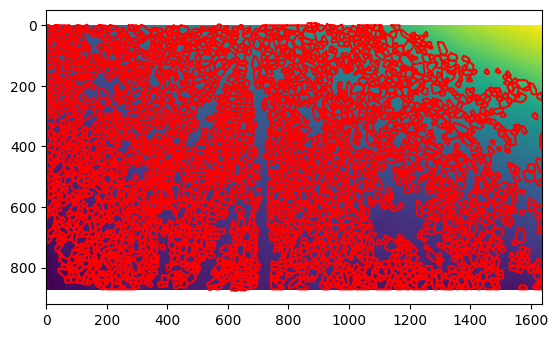

In [6]:
plt.imshow(polyfield.dem)
for p in poly_list:
    x,y = p.boundary.coords.xy
    plt.plot(x,y,c='red')

In [9]:
from apdt.detection import create_poly_mask, find_trough_nodes, find_paths

trough_arr,polygon_arr = create_poly_mask(polyfield.poly_list,polyfield.dem.shape[0],polyfield.dem.shape[1],buffer_size=2)

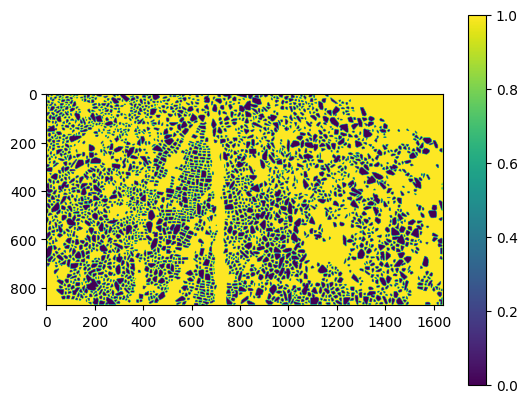

In [10]:
plt.imshow(trough_arr)
plt.colorbar();

In [11]:
polyfield.nodes,skel = find_trough_nodes(trough_arr)
polyfield.edges = find_paths(skel,polyfield.nodes) # find paths between nodes
polyfield.paths = [e['path'] for e in polyfield.edges] 

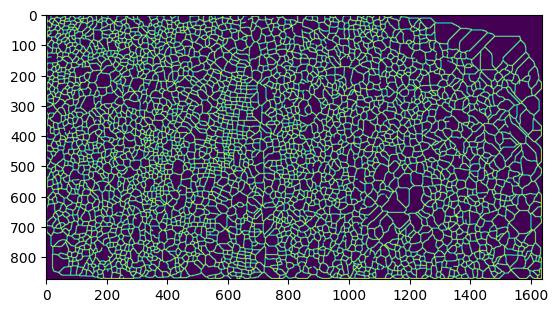

In [13]:
from skimage.morphology import dilation

plt.imshow(dilation(skel,np.ones([3,3])));

In [17]:
# save shapefiles:
path_out = 'Outputs/Stream/70-81_clipStream_'
polyfield.save_troughs(path_out+'nodes_manualedits',path_out+'trouhgs_manualedits')

Output saved to Outputs/Stream/70-81_clipStream_nodes_manualedits and Outputs/Stream/70-81_clipStream_trouhgs_manualedits.
